<a href="https://colab.research.google.com/github/we-make-ai/welcome2ki-3/blob/main/07_MNIST_DL_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.7MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 1.1MB 13.2MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 40kB 5.0MB/s 
     |████████████████████████████████| 92kB 7.3MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 2.6MB 17.9MB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

# MNIST Ziffern Klassifizierer

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [7]:
!ls

gdrive	sample_data


In [8]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [9]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [10]:
type(sevens)

fastcore.foundation.L

In [11]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [12]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [13]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [14]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## Ähnlichkeit der Pixel-Maps
Wir errechnen die "durchschnittliche" Sieben und die "durchschnittliche" Drei. Danach können wir messen, wie weit unsere aktuelle Ziffer von dieser durchschnittlichen 3 bzw. 7 entfernt ist.

In [15]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

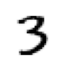

In [16]:
show_image(three_tensors[1]);

In [17]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [18]:
len(stacked_threes.shape)

3

In [19]:
stacked_threes.ndim

3

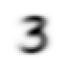

In [20]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

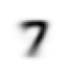

In [21]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

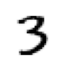

In [22]:
a_3 = stacked_threes[1]
show_image(a_3);

In [23]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [24]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [25]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [26]:
F.l1_loss(a_3.float(),mean3), F.mse_loss(a_3,mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

## NumPy Arrays vs. PyTorch Tensors

In [27]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [28]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [30]:
tns[1]

tensor([4, 5, 6])

In [31]:
tns[:,1]

tensor([2, 5])

In [32]:
tns[1,1:3]

tensor([5, 6])

In [33]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [34]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

## Metrik für das Lernen - Berechnung mittels Broadcasting

In [35]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [36]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [37]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1147, 0.1141, 0.1335,  ..., 0.1224, 0.1183, 0.1306]),
 torch.Size([1010]))

In [38]:
mean3.shape

torch.Size([28, 28])

In [39]:
# Broadcasting
tensor([1,2,3]) + tensor([1, 1, 1])

tensor([2, 3, 4])

In [40]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [41]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [42]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [43]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [44]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Stochastic Gradient Descent
### Optimierung unserer Loss-Function

In [45]:
def f(x): return x**2

/usr/local/lib/python3.6/dist-packages/fastbook/__init__.py:55: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


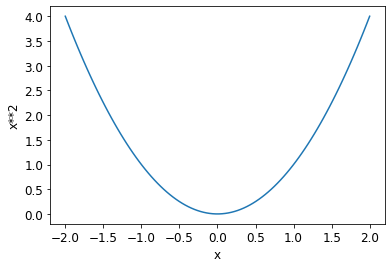

In [46]:
plot_function(f, 'x', 'x**2')

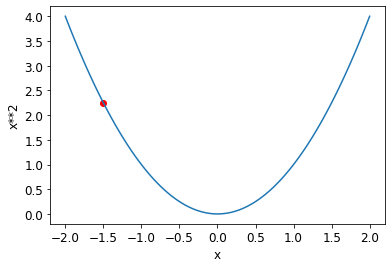

In [47]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

### Berechnung der Gradienten

In [48]:
xt = tensor(3.).requires_grad_()

In [49]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [50]:
yt.backward()

In [51]:
xt.grad

tensor(6.)

In [52]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [53]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [54]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## Vollständiges Beispiel mit Gradient Descent

In [55]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

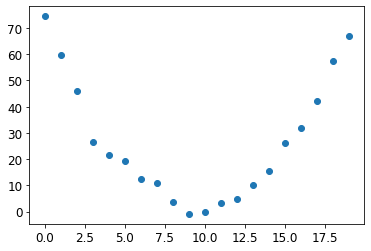

In [56]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [57]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [58]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [59]:
# Initialisieren der Parameter
params = torch.randn(3).requires_grad_()

In [60]:
orig_params = params.clone()

In [61]:
# Prognosen unseres Modells berechnen
preds = f(time, params)

In [62]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

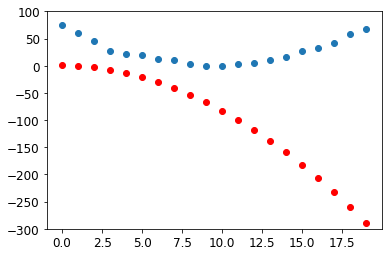

In [63]:
show_preds(preds)

In [64]:
# Loss-Funktion berechnen
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [65]:
# Loss verbessern mithilfe der Gradienten
loss.backward()
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [66]:
params.grad * 1e-5

tensor([-0.5320, -0.0342, -0.0025])

In [67]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [68]:
# Anpassen der Parameter
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [69]:
# Wurde die Prognose besser?
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

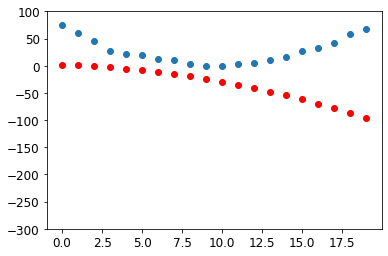

In [70]:
show_preds(preds)

In [71]:
# Nun müssen wir diesen Lernprozess wiederholen
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [72]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [73]:
params = orig_params.detach().requires_grad_()

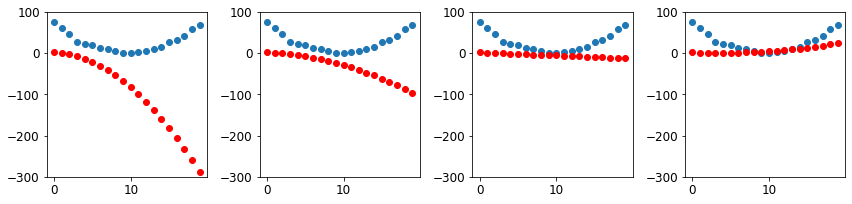

In [74]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [75]:
# Ende nach 10 Iterationen

## Gradient Descent für unser MNIST Beispiel

In [76]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [77]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [78]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [79]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [80]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [81]:
weights = init_params((28*28,1))

In [82]:
bias = init_params(1)

In [83]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [84]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [85]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [86]:
corrects.float().mean().item()

0.4912068545818329

In [87]:
weights[0] *= 1.0001

In [88]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

### Loss Funktion

In [89]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [90]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [91]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [92]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [93]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

### Die Sigmoid Funktion

In [94]:
def sigmoid(x): return 1/(1+torch.exp(-x))

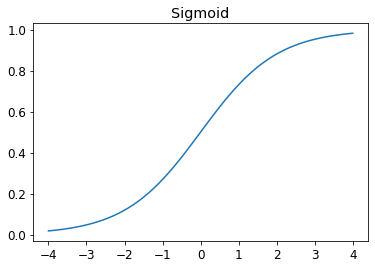

In [95]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [96]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

## Stochastic Gradient Descent - Mini Batches

In [97]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [98]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [99]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

## Integration von SGD und MiniBatches

In [100]:
weights = init_params((28*28,1))
bias = init_params(1)

In [101]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [102]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [103]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [104]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [105]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [106]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [107]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [108]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [109]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0182), tensor([-0.1260]))

In [110]:
weights.grad.zero_()
bias.grad.zero_();

In [111]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [112]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [113]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [114]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [115]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [116]:
validate_epoch(linear1)

0.5262

In [117]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6663

In [118]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8264 0.8899 0.9182 0.9275 0.9397 0.9466 0.9505 0.9524 0.9558 0.9578 0.9598 0.9608 0.9612 0.9617 0.9632 0.9637 0.9647 0.9656 0.9671 0.9676 

## Einen Optimizer erstellen

In [119]:
linear_model = nn.Linear(28*28,1)

In [120]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [121]:
class BasicOptimizer:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [122]:
opt = BasicOptimizer(linear_model.parameters(), lr)

In [123]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [124]:
validate_epoch(linear_model)

0.461

In [125]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [126]:
train_model(linear_model, 20)

0.4932 0.7685 0.8554 0.9135 0.9345 0.9482 0.957 0.9633 0.9658 0.9677 0.9697 0.9716 0.9736 0.9746 0.976 0.977 0.9775 0.9775 0.978 0.9785 

In [127]:
# using internal fastai StochasticGradientDescent Optimizer
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8179 0.8496 0.914 0.9345 0.9482 0.957 0.9619 0.9658 0.9672 0.9692 0.9712 0.9741 0.9751 0.976 0.9775 0.9775 0.978 0.9785 0.979 

## Learning mit Fastai

In [128]:
dls = DataLoaders(dl, valid_dl)

In [129]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [130]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097722,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00


## Non-Linearity

In [131]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [133]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
w2 = init_params(1)

**The Rectified Linear Unit (RELU)**

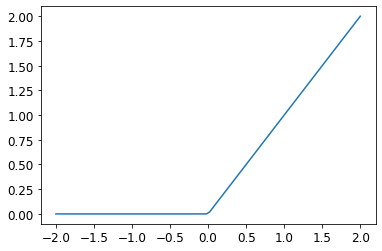

In [134]:
plot_function(F.relu)

**Approximation Theorem**

In [135]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [136]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [137]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.281497,0.410105,0.505888,00:00
1,0.135123,0.221296,0.810599,00:00
2,0.076352,0.113494,0.916585,00:00
3,0.051061,0.077187,0.942591,00:00
4,0.039184,0.060455,0.955839,00:00
5,0.033039,0.051038,0.963199,00:00
6,0.029466,0.045099,0.965162,00:00
7,0.027121,0.041028,0.967615,00:00
8,0.025420,0.038060,0.968597,00:00
9,0.024097,0.035784,0.970069,00:00


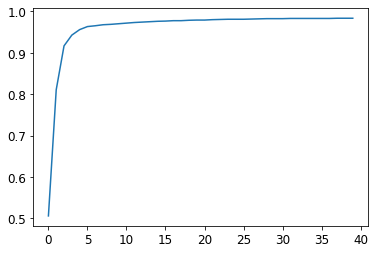

In [138]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [139]:
learn.recorder.values[-1][2]

0.983316957950592